## 딥러닝

### 심층신경망

In [160]:
# 모듈 로드
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [161]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

- 이미 이전장에서 다운로드 했기때문에 다시 다운로드 하지 않음

In [162]:
# 훈련세트, 검증세트 분리
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [163]:
train_input = train_input.reshape(-1, 28*28)
test_input = test_input.reshape(-1, 28*28)

In [164]:
# 스케일링
scaler = StandardScaler()
train_scaled = scaler.fit_transform(train_input.astype(np.float64))
test_scaled = scaler.transform(test_input.astype(np.float64))

In [165]:
# 훈련세트, 검증세트 분리
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42
)

In [166]:
print(train_scaled.shape, val_scaled.shape, test_scaled.shape)
print(train_target.shape, val_target.shape, test_target.shape)

(48000, 784) (12000, 784) (10000, 784)
(48000,) (12000,) (10000,)


#### 심층신경망 만들기1

In [167]:
# 밀집층 생성
dense1 = keras.layers.Dense(100, activation='sigmoid', input_shape=(784,), name='hidden')
dense2 = keras.layers.Dense(10, activation='softmax', name='output')

In [168]:
# 신경망 모델 생성
model = keras.Sequential([dense1, dense2])

In [169]:
# 모델 요약
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden (Dense)              (None, 100)               78500     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### 심층신경망 만들기2

In [170]:
model = keras.Sequential([
    keras.layers.Dense(100, activation='sigmoid', input_shape=(784,), name='hidden'),
    keras.layers.Dense(10, activation='softmax', name='output')
], name='Fashion_MNIST_Model')

In [171]:
model.summary()

Model: "Fashion_MNIST_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden (Dense)              (None, 100)               78500     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [172]:
# 모델 훈련전 설정
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

In [173]:
# 훈련
model.fit(train_scaled, train_target, epochs=100)

Epoch 1/100
1500/1500 [==============================] - 1s 881us/step - loss: 0.4694 - accuracy: 0.8368
Epoch 2/100
1500/1500 [==============================] - 1s 862us/step - loss: 0.3556 - accuracy: 0.8734
Epoch 3/100
1500/1500 [==============================] - 1s 859us/step - loss: 0.3194 - accuracy: 0.8846
Epoch 4/100
1500/1500 [==============================] - 1s 891us/step - loss: 0.2944 - accuracy: 0.8943
Epoch 5/100
1500/1500 [==============================] - 1s 876us/step - loss: 0.2741 - accuracy: 0.9018
Epoch 6/100
1500/1500 [==============================] - 1s 880us/step - loss: 0.2577 - accuracy: 0.9074
Epoch 7/100
1500/1500 [==============================] - 1s 870us/step - loss: 0.2438 - accuracy: 0.9119
Epoch 8/100
1500/1500 [==============================] - 1s 897us/step - loss: 0.2301 - accuracy: 0.9184
Epoch 9/100
1500/1500 [==============================] - 1s 863us/step - loss: 0.2182 - accuracy: 0.9216
Epoch 10/100
1500/1500 [==============================]

In [174]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 0s 686us/step - loss: 0.8990 - accuracy: 0.8775


[0.899006187915802, 0.8774999976158142]

In [175]:
pred_result = model.predict(test_scaled)

313/313 [==============================] - 0s 633us/step


In [176]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [177]:
# 한글로 Matplotlib 사용시 항상 필요
from matplotlib import rcParams, font_manager, rc

font_path = 'C:/Windows/Fonts/malgun.ttf'
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)
rcParams['axes.unicode_minus'] = False

sns.set_style('darkgrid')
sns.set_theme(font='Malgun Gothic', rc={'axes.unicode_minus': False})

In [178]:
class_names = ['티셔츠', '바지', '스웨터', '드레스', '코트', '샌달', '셔츠', '스니커즈', '가방', '앵클부츠']

In [179]:
# 테스트이미지와 예측결과 시각화
def show_image(index):
    plt.figure(figsize=(2,2))
    plt.imshow(test_input[index].reshape(28, 28), cmap='gray_r')
    true_label = class_names[test_target[index]]
    pred_label = class_names[np.argmax(pred_result[index])]

    # plt.title(f'실제: {true_label}, 예측: {pred_label}')
    plt.text(0, -6, f'실제: {true_label}', fontsize=12, color='blue')
    plt.text(0, -3, f'예측: {true_label}', fontsize=12, color='red', fontweight='bold')

    plt.axis('off')
    plt.show()

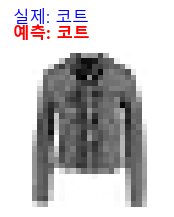

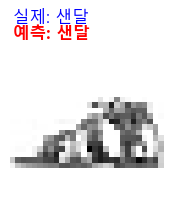

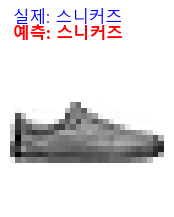

In [180]:
for i in range(10, 13):
    show_image(i)

#### 렐루 함수

- 인공신경망 은닉층에 초기에는 Sigmoid 함수 사용
    - 단점 : 오른쪽, 왼쪽 끝으로 갈수록 그래프가 누워있어서 올바른 출력을 못만듬

- 렐루함수(ReLU) : 수정된 선형유닛 뜻의 함수

    <img src="../image/ml0011.png" width="500">

#### Flatten 객체
- 이미지 2차원배열을 1차원으로 변경할때 np.reshape() 사용
- Flatten 클래스가 위의 일을 대신해줌

In [181]:
model2 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28), name ='flatten'),
    keras.layers.Dense(100, activation='relu', name='hidden'),
    keras.layers.Dense(10, activation='softmax', name='output'),
], name='Fashion_MNIST_RELU')

In [182]:
model2.summary()

Model: "Fashion_MNIST_RELU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 hidden (Dense)              (None, 100)               78500     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [183]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

In [184]:
train_scaled = train_input / 255.0
test_scaled = test_input / 255.0

In [185]:
# 훈련세트, 검증세트 분리
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42
)

In [186]:
# 모델 설정
model2.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

In [187]:
# 모델 훈련
model2.fit(train_scaled, train_target, epochs=20)

Epoch 1/20
1500/1500 [==============================] - 1s 856us/step - loss: 0.5366 - accuracy: 0.8111
Epoch 2/20
1500/1500 [==============================] - 1s 845us/step - loss: 0.3929 - accuracy: 0.8596
Epoch 3/20
1500/1500 [==============================] - 1s 856us/step - loss: 0.3542 - accuracy: 0.8733
Epoch 4/20
1500/1500 [==============================] - 1s 845us/step - loss: 0.3318 - accuracy: 0.8804
Epoch 5/20
1500/1500 [==============================] - 1s 845us/step - loss: 0.3170 - accuracy: 0.8865
Epoch 6/20
1500/1500 [==============================] - 1s 867us/step - loss: 0.3044 - accuracy: 0.8914
Epoch 7/20
1500/1500 [==============================] - 1s 856us/step - loss: 0.2933 - accuracy: 0.8953
Epoch 8/20
1500/1500 [==============================] - 1s 856us/step - loss: 0.2865 - accuracy: 0.8984
Epoch 9/20
1500/1500 [==============================] - 1s 845us/step - loss: 0.2777 - accuracy: 0.9013
Epoch 10/20
1500/1500 [==============================] - 1s 846u

In [188]:
model2.evaluate(val_scaled, val_target)
# ReLU함수 사용시, Sigmoid함수 사용시 0.01% 개선

375/375 [==============================] - 0s 735us/step - loss: 0.4307 - accuracy: 0.8823


[0.4306546151638031, 0.8823333382606506]

#### 옵티마이저
- 하이퍼파라미터 값 최적화

In [189]:
model3 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28), name ='flatten'),
    keras.layers.Dense(100, activation='relu', name='hidden'),
    keras.layers.Dense(10, activation='softmax', name='output'),
], name='Fashion_MNIST_RELU')

In [190]:
# 모델3 설정, 최적화는 adam 클래스만 사용할 것
model3.compile(loss='sparse_categorical_crossentropy', metrics='accuracy', optimizer='adam')

In [191]:
# 모델 훈련. 모델 훈련은 정보를 저장하기 때문에 다시 수행하면 이전 정보를 담고 시작작
model3.fit(train_scaled, train_target, epochs=20)

Epoch 1/20
1500/1500 [==============================] - 2s 890us/step - loss: 0.5264 - accuracy: 0.8168
Epoch 2/20
1500/1500 [==============================] - 1s 867us/step - loss: 0.3888 - accuracy: 0.8612
Epoch 3/20
1500/1500 [==============================] - 1s 877us/step - loss: 0.3491 - accuracy: 0.8734
Epoch 4/20
1500/1500 [==============================] - 1s 878us/step - loss: 0.3261 - accuracy: 0.8828
Epoch 5/20
1500/1500 [==============================] - 1s 890us/step - loss: 0.3059 - accuracy: 0.8882
Epoch 6/20
1500/1500 [==============================] - 1s 868us/step - loss: 0.2882 - accuracy: 0.8937
Epoch 7/20
1500/1500 [==============================] - 1s 870us/step - loss: 0.2770 - accuracy: 0.8972
Epoch 8/20
1500/1500 [==============================] - 1s 874us/step - loss: 0.2671 - accuracy: 0.9017
Epoch 9/20
1500/1500 [==============================] - 1s 867us/step - loss: 0.2557 - accuracy: 0.9051
Epoch 10/20
1500/1500 [==============================] - 1s 867u

- optimizer 사용시 0.01정도 개선

In [192]:
model3.evaluate(val_scaled, val_target)
# 훈련 95%, 검증 88% -7정도 차이

375/375 [==============================] - 0s 707us/step - loss: 0.3629 - accuracy: 0.8808


[0.36285147070884705, 0.8808333277702332]

#### 드롭아웃
- 훈련과정 밀집층에 일부 뉴런을 꺼버림.

In [193]:
model4 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28), name ='flatten'),
    keras.layers.Dense(100, activation='relu', name='hidden'),
    keras.layers.Dropout(0.3, name='dropout'),
    keras.layers.Dense(10, activation='softmax', name='output'),
], name='Fashion_MNIST_RELU')

In [194]:
model4.summary()

Model: "Fashion_MNIST_RELU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 hidden (Dense)              (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [195]:
# 모델4 설정, 최적화는 adam 클래스만 사용할 것
model4.compile(loss='sparse_categorical_crossentropy', metrics='accuracy', optimizer='adam')

In [196]:
# 모델 훈련. 모델 훈련은 정보를 저장하기 때문에 다시 수행하면 이전 정보를 담고 시작
model4.fit(train_scaled, train_target, epochs=20)

Epoch 1/20
1500/1500 [==============================] - 2s 935us/step - loss: 0.5916 - accuracy: 0.7899
Epoch 2/20
1500/1500 [==============================] - 1s 919us/step - loss: 0.4412 - accuracy: 0.8424
Epoch 3/20
1500/1500 [==============================] - 1s 924us/step - loss: 0.4037 - accuracy: 0.8550
Epoch 4/20
1500/1500 [==============================] - 1s 910us/step - loss: 0.3807 - accuracy: 0.8604
Epoch 5/20
1500/1500 [==============================] - 1s 905us/step - loss: 0.3667 - accuracy: 0.8654
Epoch 6/20
1500/1500 [==============================] - 1s 902us/step - loss: 0.3524 - accuracy: 0.8715
Epoch 7/20
1500/1500 [==============================] - 1s 897us/step - loss: 0.3446 - accuracy: 0.8739
Epoch 8/20
1500/1500 [==============================] - 1s 900us/step - loss: 0.3313 - accuracy: 0.8781
Epoch 9/20
1500/1500 [==============================] - 1s 910us/step - loss: 0.3260 - accuracy: 0.8805
Epoch 10/20
1500/1500 [==============================] - 1s 906u

In [197]:
model4.evaluate(val_scaled, val_target)
# 훈련 89%, 검증 88% -1차이(훈련과 검증사이에 차이가 거의 없음)

375/375 [==============================] - 0s 705us/step - loss: 0.3069 - accuracy: 0.8903


[0.3068779706954956, 0.890333354473114]

- 드롭아웃하면 정확도가 떨어짐 > 훈련과 검증(테스트)사이에 정확도 차이가 줄어듬
- `과대적합`(훈련세트 훈련에 너무 치중하여서 정확도가 너무 높은 것) 방지

#### 모델의 저장과 복원
- 훈련시간이 딥러닝에 크게 좌우됨. 저장이 없으면 다시 훈련시키고 시간을 소요해야 됨
- 파일로 저장 후 모델에 대한 구조와 파라미터만 저장하는 두가지 방법이 존재

In [198]:
# 모델4 저장 - 파라미터만 저장
model4.save_weights('./model4-weight.h5')

In [199]:
# 모델4 저장 - 전체(모델 구조와 파라미터) 저장
model4.save('./model4-whole.h5')

c:\Source\iot-dataanalysis-2025\mlvenv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


##### 모델 사용
- 파라미터만 저장한 파일을 사용하려면, 먼저 모델을 생성해야 함

In [200]:
model5 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28), name ='flatten5'),
    keras.layers.Dense(100, activation='relu', name='hidden5'),
    keras.layers.Dropout(0.3, name='dropout5'),
    keras.layers.Dense(10, activation='softmax', name='output5'),
], name='Fashion_MNIST_RELU5')

In [201]:
model5.load_weights('./model4-weight.h5')

In [202]:
model5.summary()

Model: "Fashion_MNIST_RELU5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten5 (Flatten)          (None, 784)               0         
                                                                 
 hidden5 (Dense)             (None, 100)               78500     
                                                                 
 dropout5 (Dropout)          (None, 100)               0         
                                                                 
 output5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [203]:
pred_result =model5.predict(test_scaled)

313/313 [==============================] - 0s 695us/step


- 모델까지 전부 생성해주는 방법

In [206]:
model6 = keras.models.load_model('./model4-weight.h5')

ValueError: No model config found in the file at <tensorflow.python.platform.gfile.GFile object at 0x000001F6CF1729D0>.

In [207]:
model6.summary()

NameError: name 'model6' is not defined

In [208]:
model6.evaluate(test_scaled, test_target)

NameError: name 'model6' is not defined

#### 콜백
- 실행도중 다른 일을 할 수 있도록 해주는 기능
- `조기종료`를 위해서 사용

In [ ]:
model7 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28), name ='flatten'),
    keras.layers.Dense(100, activation='relu', name='hidden'),
    keras.layers.Dropout(0.3, name='dropout'),
    keras.layers.Dense(10, activation='softmax', name='output'),
], name='Fashion_MNIST_RELU7')

In [ ]:
model7.compile(loss='sparse_categorical_crossentropy', metrics='accuracy', optimizer='adam')

In [ ]:
# 에포크마다 모델 저장기능 콜백
checkpoint_cb = keras.callbacks.ModelCheckpoint('./best-model.h5', save_best_only=True) # 최고 상태면 저장
# 조기종료 콜백
## 두번이상 훈련값이 동일하면 조기종료, 이전 최고상태로 복구
early_stopp_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)

In [ ]:
# 모델 훈련. 모델 훈련은 정보를 저장하기 때문에 다시 수행하면 이전 정보를 담고 시작
model7.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target),
           callbacks=[checkpoint_cb, early_stopp_cb])

- 20번중 15번 반복에서 조기종료

In [ ]:
model7.evaluate(val_scaled, val_target)

In [ ]:
model7.evaluate(test_scaled, test_target)

In [ ]:
early_stopp_cb.stopped_epoch

- 20번중 15번 반복에서 조기종료

#### 결론
- `심층 신경망` : 2개 이상의 밀집층을 포함한 신경망 모델. 다층 인공신경망
- `렐루함수` : 시그모이드 함수의 단점을 보완한 활성화 함수
- `옵티마이저` : 신경망의 가중치(기울기)와 절편을 학습하기 위한 알고리즘 또는 방법. `Adam`, SGD(확률적 경사하강법), RMSprop...
- `드롭아웃` : 밀집층의 뉴런을 임의로 꺼서 훈련을 덜 시키는 것. 과대적합 막기위해서 수행
- 모델 저장과 복원 : 이미 훈련된 데이터를 저장했다가 나중에 다시 쓰기 위해서
- `콜백` : 에포크마다 모델 저장 또는 조기종료를 위해서 훈련 도중에 다른 기능을 수행하는 것